In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

In [2]:
train_dir = r'C:\Users\DELL\Desktop\Image Classification 2\seg_train\train'
test_dir = r'C:\Users\DELL\Desktop\Image Classification 2\seg_test'
img_size = 200
lr = 1e-3
model_name = 'kaggle_classification.model'

In [3]:
def label_img(img) :
    word_label = img.split('.')[-3]
    if word_label=='building' :
        return [0,0,0,0,0,1]
    elif word_label=='forest' :
        return [0,0,0,0,1,0]
    elif word_label=='glacier' :
        return [0,0,0,1,0,0]
    elif word_label=='mountain' :
        return [0,0,1,0,0,0]
    elif word_label=='sea' :
        return [0,1,0,0,0,0]
    elif word_label=='street' :
        return [1,0,0,0,0,0]
    

In [4]:
def create_train_data() :
    train_data = []
    for img in tqdm(os.listdir(train_dir)) :
        label = label_img(img)
        path = os.path.join(train_dir,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(img_size,img_size))
        train_data.append([np.array(img),np.array(label)])
    shuffle(train_data)
    np.save('train_data.npy',train_data)
    return train_data

In [5]:
def process_test_data() :
    test_data = []
    for img in tqdm(os.listdir(test_dir)) :
        path = os.path.join(test_dir,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(img_size,img_size))
        test_data.append([np.array(img),img_num])
    np.save('test_data.npy',test_data)
    return test_data

In [6]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

tf.reset_default_graph()

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 6, activation='relu')
convnet = max_pool_2d(convnet, 6)

convnet = conv_2d(convnet, 64, 6, activation='relu')
convnet = max_pool_2d(convnet, 6)

convnet = conv_2d(convnet, 32, 6, activation='relu')
convnet = max_pool_2d(convnet, 6)

convnet = conv_2d(convnet, 64, 6, activation='relu')
convnet = max_pool_2d(convnet, 6)

convnet = conv_2d(convnet, 32, 6, activation='relu')
convnet = max_pool_2d(convnet, 6)

convnet = conv_2d(convnet, 64, 6, activation='relu')
convnet = max_pool_2d(convnet, 6)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 6, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet,tensorboard_dir='log')


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dell\appdata\

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Scipy not supported!


In [7]:
train_data = create_train_data()

100%|████████████████████████████████████████████████████████████████████████████| 14034/14034 [02:25<00:00, 96.54it/s]


In [8]:
train = train_data[:-500]
test = train_data[-500:]

In [9]:
X = np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
Y = np.array([i[1] for i in train])

In [10]:
X

array([[[[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  1],
         [  1],
         [  1]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  1],
         [  1],
         [  1]],

        ...,

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]]],


       [[[ 94],
         [ 94],
         [ 94],
         ...,
         [ 78],
         [ 78],
         [ 78]],

        [[ 95],
         [ 94],
         [ 94],
         ...,
         [ 78],
         [ 78],
         [ 78]],

        [[ 95],
         [ 94],
         [ 94],
         ...,
         [ 78],
         [

In [11]:
Y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [12]:
test_x = np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
test_y = [i[1] for i in test]

In [13]:
test_x

array([[[[219],
         [224],
         [230],
         ...,
         [208],
         [208],
         [208]],

        [[225],
         [227],
         [231],
         ...,
         [209],
         [209],
         [209]],

        [[231],
         [232],
         [233],
         ...,
         [209],
         [209],
         [209]],

        ...,

        [[140],
         [141],
         [142],
         ...,
         [ 62],
         [ 62],
         [ 62]],

        [[173],
         [174],
         [174],
         ...,
         [ 62],
         [ 62],
         [ 63]],

        [[169],
         [171],
         [173],
         ...,
         [ 63],
         [ 63],
         [ 64]]],


       [[[129],
         [126],
         [125],
         ...,
         [ 83],
         [ 94],
         [ 88]],

        [[135],
         [126],
         [125],
         ...,
         [ 83],
         [ 94],
         [ 85]],

        [[137],
         [125],
         [121],
         ...,
         [ 87],
         [

In [14]:
test_y

[array([0, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 

In [15]:
model.fit({'input': X}, {'targets': Y}, n_epoch=50, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 10599  | total loss: 0.06165 | time: 486.092s
| Adam | epoch: 050 | loss: 0.06165 - acc: 0.9765 -- iter: 13504/13534
Training Step: 10600  | total loss: 0.05732 | time: 494.751s
| Adam | epoch: 050 | loss: 0.05732 - acc: 0.9788 | val_loss: 1.21210 - val_acc: 0.7900 -- iter: 13534/13534
--


In [17]:
model.save(model_name)

INFO:tensorflow:C:\Users\DELL\Desktop\Image Classification 2\kaggle_classification.model is not in all_model_checkpoint_paths. Manually adding it.


In [18]:
if os.path.exists("{}.meta".format(model_name)) :
    model.load(model_name)
    print("Model loaded!")

INFO:tensorflow:Restoring parameters from C:\Users\DELL\Desktop\Image Classification 2\kaggle_classification.model
Model loaded!


In [19]:
test_data = process_test_data()

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:30<00:00, 97.31it/s]


In [20]:
import matplotlib.pyplot as plt


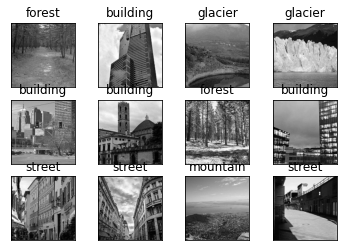

In [21]:
fig = plt.figure()
for num,data in enumerate(test_data[:12]) :
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1) 
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    model_out = model.predict([data])[0]
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if np.argmax(model_out) == 5 :
        str_label = 'building'
    elif np.argmax(model_out) == 4 :
        str_label = 'forest'
    elif np.argmax(model_out) == 3 :
        str_label = 'glacier'
    elif np.argmax(model_out) == 2 :
        str_label = 'mountain'
    elif np.argmax(model_out) == 1 :
        str_label = 'sea'
    elif np.argmax(model_out) == 0 :
        str_label = 'street'
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
plt.show()
    

In [22]:
id,label = [],[]
for data in tqdm(test_data) :
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    model_out = model.predict([data])[0]
    id.append(img_num)
    label.append([model_out[0],model_out[1],model_out[2],model_out[3],model_out[4],model_out[5]])


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:40<00:00, 74.39it/s]


In [23]:
print(label)

[[0.005630886, 0.002875436, 0.003281774, 0.007203335, 0.9791875, 0.001821073], [5.734703e-07, 1.6772016e-07, 4.776876e-06, 2.707509e-06, 5.1582898e-08, 0.9999918], [0.0023058164, 0.010316149, 0.080606185, 0.9050394, 0.00045306009, 0.0012793962], [5.3143904e-14, 4.8564885e-13, 2.2050677e-11, 1.0, 1.6889136e-16, 8.874672e-14], [5.8444635e-05, 3.2833716e-05, 0.00021616425, 0.00014392394, 1.0043635e-05, 0.99953866], [0.00024716213, 0.00010361693, 0.000880607, 0.00046143035, 0.000115089795, 0.99819213], [2.5241949e-08, 8.213145e-11, 2.7596161e-10, 2.6688285e-08, 1.0, 5.819409e-10], [2.5259068e-08, 4.640909e-09, 4.5319462e-07, 5.443607e-07, 1.9507669e-09, 0.9999989], [0.9961772, 0.00022680812, 5.145501e-05, 0.00020990388, 1.706247e-05, 0.0033174853], [0.996609, 0.00050681864, 0.00019867034, 0.0008068419, 0.00013875579, 0.0017400547], [2.2503648e-06, 0.000116206764, 0.9995091, 0.00032546205, 3.5848363e-05, 1.1114576e-05], [0.9922869, 0.00026563433, 0.00027997265, 0.00474365, 0.0015397498, 0.0

In [24]:
id

['20056',
 '20057',
 '20058',
 '20059',
 '20060',
 '20061',
 '20062',
 '20064',
 '20066',
 '20067',
 '20068',
 '20069',
 '20070',
 '20071',
 '20072',
 '20073',
 '20074',
 '20075',
 '20076',
 '20077',
 '20078',
 '20079',
 '20080',
 '20081',
 '20082',
 '20083',
 '20084',
 '20085',
 '20087',
 '20088',
 '20089',
 '20090',
 '20091',
 '20092',
 '20093',
 '20094',
 '20095',
 '20096',
 '20098',
 '20099',
 '20100',
 '20106',
 '20107',
 '20108',
 '20109',
 '20111',
 '20112',
 '20113',
 '20114',
 '20115',
 '20116',
 '20117',
 '20120',
 '20123',
 '20124',
 '20126',
 '20127',
 '20129',
 '20131',
 '20133',
 '20134',
 '20136',
 '20137',
 '20138',
 '20140',
 '20142',
 '20144',
 '20147',
 '20148',
 '20150',
 '20151',
 '20152',
 '20153',
 '20154',
 '20157',
 '20158',
 '20159',
 '20160',
 '20161',
 '20162',
 '20163',
 '20164',
 '20165',
 '20166',
 '20167',
 '20168',
 '20170',
 '20171',
 '20172',
 '20173',
 '20174',
 '20175',
 '20176',
 '20177',
 '20178',
 '20179',
 '20181',
 '20183',
 '20184',
 '20185',


In [25]:
l = []
for item in label :
    l.append(item.index(max(item)))

In [26]:
print(np.array(l))

[4 5 3 ... 2 0 3]


In [27]:
import pandas as pd

In [28]:
data = {'id':id,'label':l}
df = pd.DataFrame(data)
df

,id,label
0,20056,4
1,20057,5
2,20058,3
3,20059,3
4,20060,5
...,...,...
2995,24325,1
2996,24328,2
2997,24329,2
2998,24332,0


In [29]:
df.to_csv('answer.csv',index=False)

In [16]:
## 0 - street
## 1 - sea
## 2 - mountain
## 3 - glacier
## 4 - forest
## 5 - building